In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles

import matplotlib as mpl
mpl.rcParams['font.serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

## Table S3: Genetic risk genes of COVID-19 GWAS

In [66]:
s3 = pd.read_excel('../source_with_direction/GWAS/gwas_eqtl_direction.xlsx')

In [6]:
genesymbol = pd.read_pickle('http://115.24.151.181/ID_convert/Gene_Symbol-Gene_ID.pkl')

In [68]:
s3 = s3[s3['geneSymbol'].isin(genesymbol.index)]
s3.to_excel('./Table S3.xlsx',index=False)

In [69]:
len(s3['geneSymbol'].unique())

80

## Table S4: Physical interacting genes

In [125]:
s4 = pd.read_excel('../source_with_direction/PPI/PPI_allsource_DEG.xlsx')
s4['Host Gene Source'] = s4['Host Gene Source'].astype(str)

In [126]:
for doi,pmid in {'2020.06.17.156455':'33845483',
'j.medj.2020.07.002':'32838362'}.items():
    s4['Host Gene Source'] = s4['Host Gene Source'].str.replace(doi,pmid)

In [127]:
s4['Host Gene Source'].value_counts()

33845483             1450
33060197              671
32838362              241
32353859,33060197     239
STRING Viruses         74
22046132               52
33845483,32838362      44
28643204                2
28759649                2
32353859                2
31852899                1
Name: Host Gene Source, dtype: int64

In [128]:
s4['Host Gene Source'] = 'PMID:'+s4['Host Gene Source']
s4['Host Gene Source'] = s4['Host Gene Source'].str.replace('PMID:STRING Viruses','STRING Viruses')

In [129]:
s4 = s4[s4['Direction'].notnull()]

In [130]:
s4['Virus'] = s4['Virus'].str.replace('SARS-CoV2','SARS-CoV-2')
s4.to_excel('./Table S4.xlsx',index=False)

In [131]:
len(s4)

435

## Figure S2

In [30]:
figs4 = s4.copy()
figs4['count'] = 1
figs4 = pd.pivot(s4, columns='Virus', index='Host Gene',values='count').fillna(0)

In [33]:
from upsetplot import plot

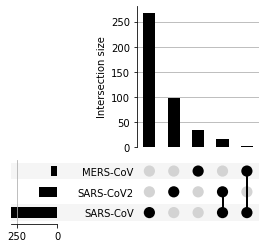

In [38]:
plot(figs4.value_counts())
current_figure = plt.gcf()
current_figure.savefig('./Figure S2.pdf')

In [41]:
len(figs4[(figs4['SARS-CoV']==1)&(figs4['SARS-CoV2']==1)])

16

In [42]:
figs4[(figs4['SARS-CoV']==1)&(figs4['SARS-CoV2']==1)]

Virus,MERS-CoV,SARS-CoV,SARS-CoV2
Host Gene,,,
ACO1,0.0,1.0,1.0
BMPR2,0.0,1.0,1.0
BRI3BP,0.0,1.0,1.0
CD38,0.0,1.0,1.0
ELOVL7,0.0,1.0,1.0
EXOSC5,0.0,1.0,1.0
FITM2,0.0,1.0,1.0
LAP3,0.0,1.0,1.0
LRP10,0.0,1.0,1.0


In [57]:
s4[s4['Host Gene']=='PCDH9']

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source,count
511,SARS-CoV,PCDH9,AP-MS,PMID:33845483,-1.0,DEG,GSE33267,1
1962,SARS-CoV2,PCDH9,AP-MS,PMID:33845483,1.0,DEG,GSE152586,1


## Table S6: Biological regulatory genes

In [118]:
s6 = pd.read_excel('../source_with_direction/CRISPR/ALL_CRISPR.xlsx')

In [119]:
s6['Host Gene Source'].value_counts()

33147444    592
33686287    196
33382968    137
33574281     99
33147445     99
33333024     97
Name: Host Gene Source, dtype: int64

In [120]:
s6['Host Gene Source'] = 'PMID:'+s6['Host Gene Source'].astype(str)
s6['Direction Source'] = s6['Host Gene Source']

In [121]:
s6 = s6[s6['Host Gene'].isin(genesymbol.index)]

In [122]:
s6

,Virus,Host Gene,Host Gene Type,Host Gene Source,Direction,Direciton Type,Direction Source
0,SARS-CoV2,ACE2,CRISPR-Screening,PMID:33574281,1,CRISPR-Screening,PMID:33574281
1,SARS-CoV2,COMMD3,CRISPR-Screening,PMID:33574281,1,CRISPR-Screening,PMID:33574281
3,SARS-CoV2,RAB7A,CRISPR-Screening,PMID:33574281,1,CRISPR-Screening,PMID:33574281
4,SARS-CoV2,CCDC93,CRISPR-Screening,PMID:33574281,1,CRISPR-Screening,PMID:33574281
5,SARS-CoV2,CCDC22,CRISPR-Screening,PMID:33574281,1,CRISPR-Screening,PMID:33574281
...,...,...,...,...,...,...,...
1215,SARS-CoV2,STAC3,CRISPR-Screening,PMID:33382968,-1,CRISPR-Screening,PMID:33382968
1216,SARS-CoV2,HAUS4,CRISPR-Screening,PMID:33382968,-1,CRISPR-Screening,PMID:33382968
1217,SARS-CoV2,SLC31A1,CRISPR-Screening,PMID:33382968,-1,CRISPR-Screening,PMID:33382968
1218,SARS-CoV2,OR4F3,CRISPR-Screening,PMID:33382968,1,CRISPR-Screening,PMID:33382968


In [123]:
s6['Virus'] = s6['Virus'].str.replace('SARS-CoV2','SARS-CoV-2')
s6.to_excel('./Table S6.xlsx', index=False)

In [124]:
len(s6['Host Gene'].unique())

958

## Figure S3

In [106]:
figs3 = s6.copy()
figs3 = figs3.drop_duplicates(['Virus','Host Gene'])
figs3['count'] = 1
figs3 = pd.pivot(figs3, columns='Virus',index='Host Gene',values='count').fillna(0)

In [107]:
figs3

Virus,MERS-CoV,SARS-CoV,SARS-CoV2
Host Gene,,,
A1BG,0.0,0.0,1.0
AASDHPPT,0.0,0.0,1.0
ABCA6,0.0,1.0,0.0
ABCC11,0.0,0.0,1.0
ABHD12,0.0,0.0,1.0
...,...,...,...
ZNF624,0.0,0.0,1.0
ZNF628,0.0,1.0,1.0
ZNF630,0.0,0.0,1.0


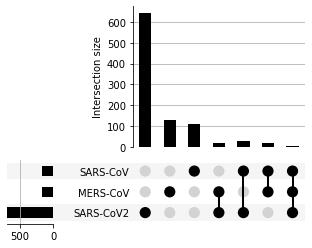

In [108]:
plot(figs3.value_counts())
current_figure = plt.gcf()
current_figure.savefig('./Figure S3.pdf')

In [110]:
figs3[(figs3['MERS-CoV']==1)&(figs3['SARS-CoV']==1)&(figs3['SARS-CoV2']==1)]

Virus,MERS-CoV,SARS-CoV,SARS-CoV2
Host Gene,,,
ARID1A,1.0,1.0,1.0
BPTF,1.0,1.0,1.0
CTSL,1.0,1.0,1.0
JMJD6,1.0,1.0,1.0
KDM6A,1.0,1.0,1.0
LY6E,1.0,1.0,1.0
SMARCC1,1.0,1.0,1.0


## Table S7: All host genes and their direction

In [2]:
s7 = pd.read_excel('../source_with_direction/all_host_genes_direction.xlsx')

In [6]:
len(s7[s7['Virus']=='MERS-CoV']['Host Gene'].unique())

236

In [12]:
s7 = s7[s7['Host Gene'].isin(genesymbol.index)]
s7['Virus'] = s7['Virus'].str.replace('SARS-CoV2','SARS-CoV-2')

In [8]:
s7 = s7[s7['Direction'].isin([1,-1])]
s7.to_excel('./Table S7.xlsx', index=False)

In [9]:
len(s7['Host Gene'].unique())

1410

## Table S8: Risk genes of 20 diseases

In [51]:
s8 = pd.read_csv('../map_drugs/variant_gene_direction.txt',sep=',')

In [52]:
s8.head()

,Disease,gwas id,rsid,ref,alt,pos,risk,GWAS P,GWAS Beta,Finemapping Pro,gene id,gene_name,DirCE,type,eQTL/BSIFT
0,Essential Hypertension,AT599,rs55857306,G,A,11895795,G,2.964100e-15,-0.007828,0.079152,ENSG00000177000,MTHFR,I,Regulatory,A/0.41057899999999997/0.062255200000000004/Who...
1,Essential Hypertension,AT599,rs55857306,G,A,11895795,G,2.964100e-15,-0.007828,0.079152,ENSG00000011021,CLCN6,I,Regulatory,A/0.238828/0.038962199999999995/Whole_Blood
2,Essential Hypertension,AT599,rs12567136,C,T,11883731,C,3.064300e-15,-0.007819,0.076602,ENSG00000177000,MTHFR,I,Regulatory,T/0.407509/0.0620414/Whole_Blood
3,Essential Hypertension,AT599,rs12567136,C,T,11883731,C,3.064300e-15,-0.007819,0.076602,ENSG00000011021,CLCN6,I,Regulatory,T/0.230262/0.0389605/Whole_Blood
4,Essential Hypertension,AT599,rs6699618,C,G,11881441,C,3.112500e-15,-0.007821,0.075472,ENSG00000177000,MTHFR,I,Regulatory,G/0.41630200000000006/0.0620185/Whole_Blood


In [53]:
len(s8['Disease'].unique())

17

In [54]:
s8 = s8.drop_duplicates(['Disease','gene id'])

In [55]:
s8.to_excel('./Table S8.xlsx', index=False)

In [49]:
s8

,Disease,gwas id,rsid,ref,alt,pos,risk,GWAS P,GWAS Beta,Finemapping Pro,gene id,gene_name,DirCE,type,eQTL/BSIFT
0,Essential Hypertension,AT599,rs55857306,G,A,11895795,G,2.964100e-15,-0.007828,0.079152,ENSG00000177000,MTHFR,I,Regulatory,A/0.41057899999999997/0.062255200000000004/Who...
1,Essential Hypertension,AT599,rs55857306,G,A,11895795,G,2.964100e-15,-0.007828,0.079152,ENSG00000011021,CLCN6,I,Regulatory,A/0.238828/0.038962199999999995/Whole_Blood
38,Essential Hypertension,AT599,rs41275508,C,G,11904049,C,9.302200e-14,-0.011936,0.002685,ENSG00000242349,.,A,Regulatory,G/-0.707187/0.145586/Whole_Blood
58,Essential Hypertension,AT599,rs10493818,C,T,89333557,T,1.052100e-10,0.004871,0.078805,ENSG00000137944,KYAT3,I,Regulatory,T/-0.170756/0.0327051/Whole_Blood
59,Essential Hypertension,AT599,rs10493818,C,T,89333557,T,1.052100e-10,0.004871,0.078805,ENSG00000117226,GBP3,I,Regulatory,T/-0.17265899999999998/0.0404327/Whole_Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75261,Coronary Artery Disease,CA448,rs867186,G,A,33764554,A,6.840000e-12,0.057300,0.779162,ENSG00000101000,PROCR,I,Missense,-0.97
75262,"Diabetes Mellitus, Type 1",CA266,rs34536443,G,C,10463118,G,8.802093e-15,-0.457443,0.995401,ENSG00000105397,TYK2,I,Missense,-1.0
75263,"Diabetes Mellitus, Type 2",OT320,rs1801282,C,G,12393125,C,1.833000e-24,-0.112400,0.297779,ENSG00000132170,PPARG,I,Missense,-0.98
75268,"Lupus Erythematosus, Systemic",CA022,rs12272434,A,T,615011,A,1.245910e-10,-0.210721,0.017702,ENSG00000185507,IRF7,I,Missense,-0.97


## Table 1. FDA-approved drugs in top 100 drugs

In [2]:
t1 = pd.read_csv('../map_drugs/drugs_rank.csv')
t1 = t1[:100]
t1 = t1[t1['Clinical Phase']==4]

In [3]:
t1['Rank'] = t1.index+1
t1['Drug'] = t1['Drug'].str.title()

In [4]:
anno_reposition = pd.read_csv('../map_drugs/anno_repostition.txt',sep='\t')

In [10]:
t1['Directly target host genes'] = ''

In [12]:
for i in t1.index:
    drug = t1.loc[i,'CHEMBL ID']
    a = anno_reposition[(anno_reposition['CHEMBL ID']==drug)&(anno_reposition['Path'].isnull())]
    if len(a)>0:
        t1.loc[i,'Directly target host genes'] = ', '.join(a['Host Gene'].unique())

In [16]:
t1.to_excel('./1.xlsx',index=False)

In [16]:
t1 = t1[['Rank','Drug','CHEMBL ID','Clinical Trial','Comorbidity']]

In [25]:
clinicals = pd.read_csv('./SearchResults.tsv',sep='\t')

In [26]:
clinicals['Interventions'] = clinicals['Interventions'].astype(str).str.lower()

In [30]:
for drug in t1['Drug'].values:
    a = clinicals[clinicals['Interventions'].str.contains(drug.lower())]
    if len(a)>0:
        print(drug)
        print(','.join(a['NCT Number'].unique()))

Thalidomide
NCT04273581,NCT04273529
Aspirin
NCT04333407,NCT04498273,NCT04343001,NCT04410328,NCT04365309,NCT04381936,NCT04363840,NCT02735707,NCT04324463,NCT04425863
Cannabidiol
NCT04731116,NCT04615949,NCT04467918,NCT04504877
Lenalidomide
NCT04361643
Minocycline
NCT05077813
Progesterone
NCT04365127,NCT04865029
Chlorpromazine
NCT04366739,NCT04354805
Ketamine
NCT04365985,NCT04769297


In [20]:
clinicals

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04372602,Duvelisib to Combat COVID-19,NaN,"Active, not recruiting",No Results Available,COVID-19,drug: duvelisib|procedure: peripheral blood dr...,Overall survival|Length of hospital stay|Lengt...,Washington University School of Medicine|Veras...,...,202007009,"October 12, 2020","February 5, 2022","July 19, 2023","May 4, 2020",NaN,"February 22, 2022","Washington University School of Medicine, Sain...",NaN,https://ClinicalTrials.gov/show/NCT04372602
1,2,NCT05242185,Long Term Sequelae of COVID-19,NaN,Recruiting,No Results Available,COVID-19,other: observational study,The primary end point will be the prevalence a...,International Centre for Diarrhoeal Disease Re...,...,PR-20128,"February 8, 2021","November 30, 2022","November 30, 2022","February 16, 2022",NaN,"February 16, 2022","ICDDR,B, Dhaka, Bangladesh",NaN,https://ClinicalTrials.gov/show/NCT05242185
2,3,NCT04902157,Relationship Between CT- Value With Prognosis ...,NaN,Recruiting,No Results Available,COVID-19,diagnostic test: cycle threshold,prognosis,Shahid Beheshti University of Medical Sciences,...,SBMU.34.675,"February 1, 2021","January 1, 2022","February 1, 2022","May 26, 2021",NaN,"May 26, 2021","SBMU, Tehran, Iran, Islamic Republic of|Nooshi...",NaN,https://ClinicalTrials.gov/show/NCT04902157
3,4,NCT04364698,Observational Cohort of COVID-19 Patients at R...,COVID-RPC,Recruiting,No Results Available,COVID-19,NaN,"clinical, biological and radiological characte...",Assistance Publique - Hôpitaux de Paris,...,20SBS-COVID-RPC,"May 7, 2020",June 2020,June 2020,"April 28, 2020",NaN,"May 14, 2020","Department of Infectiology, Raymond Poincaré H...",NaN,https://ClinicalTrials.gov/show/NCT04364698
4,5,NCT04459637,COVID-19 Surveillance Based on Smart Wearable ...,COVID-19SWD,Not yet recruiting,No Results Available,COVID-19,NaN,Deterioration of the condition|Mortality|The i...,Peking University First Hospital,...,2020055-0615,"July 1, 2020","March 10, 2021","March 10, 2021","July 7, 2020",NaN,"July 7, 2020","Peking University First Hospital, Beijing, Bei...",NaN,https://ClinicalTrials.gov/show/NCT04459637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,7601,NCT04684602,Mesenchymal Stem Cells for the Treatment of Va...,NaN,Recruiting,No Results Available,Autoimmune Diseases|Cardiovascular Disorders|D...,biological: primepro™/ primemsk™,Assessment of quality of life (QOL) via 36-Ite...,Thomas Advanced Medical LLC|HeartStem Institut...,...,ICSS-2020-032,"July 9, 2020","July 9, 2030","December 9, 2030","December 24, 2020",NaN,"December 24, 2020",Southern California Hospital at Culver City / ...,NaN,https://ClinicalTrials.gov/show/NCT04684602
7596,7602,NCT05002179,Echinaforce Study to Investigate Explorative P...,NaN,Completed,No Results Available,Respiratory Tract Infections|Common Cold,drug: echinaforce chewable tablets,"Incidence of respiratory tract infections ""vRT...",A. Vogel AG|CONVEX CRO|d.s.h. statistical serv...,...,5'000'760,"November 20, 2020","May 29, 2021","May 29, 2021","August 12, 2021",NaN,"August 12, 2021",Diagnostics and Consultation Center Convex EOO...,NaN,https://ClinicalTrials.gov/show/NCT05002179
7597,7603,NCT04939350,Evaluation of the Vaccination Coverage of Cirr...,VACCIR,Recruiting,No Results Available,Cirrhosis,other: questionnaire,percentage fully immunization coverage|percent...,Centre Hospitalier Sud Francilien,...,IDRCB 2021-A00343-38,"September 27, 2021","June 30, 2022","June 30, 2022","June 25, 2021",NaN,"January 11, 2022","Centre Hospitalier Sud Francilien, Corbeil-ess...",NaN,https://ClinicalTrials.gov/show/NCT04939350
7598,7604,NCT04723602,"Evaluation of Safety, Tolerability and Immune ...",NaN,"Active, not recruiting",No Results Availab

In [19]:
t1

,Rank,Drug,CHEMBL ID,Clinical Trial,Comorbidity
2,3,Bosutinib,CHEMBL288441,0,"Coronary Artery Disease;Diabetes Mellitus, Type 2"
4,5,Thalidomide,CHEMBL468,1,NaN
6,7,Aspirin,CHEMBL25,1,NaN
12,13,Midostaurin,CHEMBL608533,0,Essential Hypertension
14,15,Regorafenib,CHEMBL1946170,0,NaN
17,18,Pseudoephedrine,CHEMBL1590,0,Essential Hypertension
18,19,Ponatinib,CHEMBL1171837,0,NaN
22,23,Cannabidiol,CHEMBL190461,1,"Diabetes Mellitus, Type 2;Coronary Artery Disease"
27,28,Adapalene,CHEMBL1265,0,NaN
28,29,Panobinostat,CHEMBL483254,0,NaN
